<a href="https://colab.research.google.com/github/davsan06/Cosmo_with_Supernovae_Ia/blob/main/Proyecto_Investigaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Variables 
# C = Velocidad de la luz
# Mpc = Valor de 1 MegaPársec
# H = Constante de Hubble
# RH = Radio de HUbble
# Am = Abundancia de materia
# Ar = Abundancia de radiación
# AeO = Abundancia de energía oscura
# w = Constante de Barotropía
# z = redshift
# Hz = Parámetro de Hubble
# AK = Abundancia de curvatura
# X(z) = Distancia comóvil



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
import os

In [ ]:
Mpc = 3.086*10**22
c = 2.99792e5
H = 70
RH = c/H
Am = 0.3
Ar = 9*10**-5
AeO = 0.7
w = -1
Ak = 0

In [ ]:
def par_hubble(z,H,Am,Ar,AeO):

  # La abundancia de curvatura esta ligada por
  Ak = 1- Am - AeO
  c = H*np.sqrt(Ar*(1+z)**4 + Am*(1+z)**3 + Ak*(1+z)**2 + AeO)

  return(c)

Comprobación: recuperamos la constante de Hubble introducida. A redshift z=0 el parámetro de Hubble es lo que conocemos como la constante de Hubble.

In [ ]:
print(par_hubble(z=0, H=70, Am=0.3, Ar=0, AeO=0.7))

70.0


In [ ]:
#Parámetro de Hubble en el Modelo Cosmológico Estandar
print(par_hubble(z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0, AeO=0.7))

[ 70.          70.64632224  71.31253777  71.99859939  72.70444537
  73.43000035  74.17517616  74.93987267  75.72397867  76.52737267
  77.34992373  78.19149228  79.05193091  79.93108511  80.82879402
  81.74489116  82.67920506  83.63155994  84.60177632  85.5896716
  86.59506062  87.61775614  88.65756938  89.71431043  90.78778868
  91.8778132   92.98419314  94.106738    95.24525799  96.39956426
  97.56946919  98.7547866   99.95533193 101.17092248 102.40137751
 103.64651845 104.90616894 106.18015505 107.46830527 108.77045066
 110.08642487 111.41606425 112.75920783 114.11569742 115.48537755
 116.86809558 118.26370166 119.67204869 121.09299242 122.52639134
 123.97210671 125.43000252 126.89994551 128.38180506 129.87545326
 131.38076476 132.89761686 134.42588934 135.96546455 137.51622726
 139.07806467 140.65086636 142.23452425 143.82893253 145.43398764
 147.0495882  148.67563501 150.31203093 151.9586809  153.61549187
 155.28237275 156.95923437 158.64598943 160.34255247 162.04883982
 163.764769

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
 z=np.linspace(0, 2, 100)

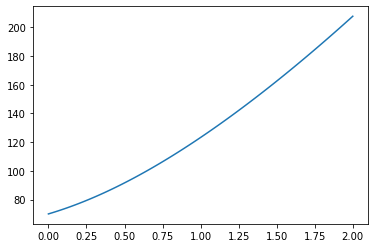

In [ ]:
#Graficamos el parámetro de Hubble en el Módelo Cosmológico Estándar, con un redshift  formado por un array de 0 a 2 con 100 puntos 

plt.figure()
plt.plot(z, par_hubble(z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0, AeO=0.7), label= 'λCDM' )
plt.show()


In [ ]:
def dist_comovil(z,H,Am,Ar,AeO):

  # La abundancia de curvatura esta ligada por
  Ak = 1- Am - AeO

  # Definimos el integrando de la ecuación de la distancia comóvil
  def E(z):
    
    # return H/np.sqrt(Ar*(1+z)**4 + Am*(1+z)**3 + Ak*(1+z)**2 + AeO)
    return 1/np.sqrt(Ar*(1+z)**4 + Am*(1+z)**3 + Ak*(1+z)**2 + AeO)

  Chi=np.zeros_like(z)

  for i in np.arange(len(z)):
      Chi[i]=RH*sci.quad(E,0,z[i])[0]

  return Chi

In [ ]:
print(dist_comovil(z=np.linspace(0,1,20), H=65,Am=0.0,Ar=0.0,AeO=1.0))

[   0.          225.4075188   450.81503759  676.22255639  901.63007519
 1127.03759398 1352.44511278 1577.85263158 1803.26015038 2028.66766917
 2254.07518797 2479.48270677 2704.89022556 2930.29774436 3155.70526316
 3381.11278195 3606.52030075 3831.92781955 4057.33533835 4282.74285714]


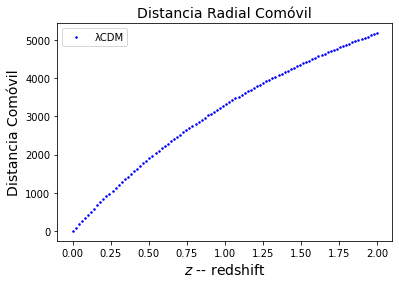

In [ ]:
plt.figure()
plt.errorbar(np.linspace(0, 2,100), dist_comovil(z=np.linspace(0, 2,100), H=70,Am=0.3,Ar=0.0,AeO=0.7), fmt='o', ms=1.5, color='b', elinewidth=0.8,capsize=1, label= 'λCDM')
plt.legend()
plt.xlabel(r'$z$ -- redshift', fontsize = 14)
plt.ylabel('Distancia Comóvil', fontsize = 14)
plt.title('Distancia Radial Comóvil', fontsize = 14)
plt.show()

In [ ]:
#Definimos la distancia transversal comóvil y mediante bucles condicionales (if,elif) definimos las diferentes situaciones para la abundancia de curvatura

def dist_trans(RH,z,H,Am,Ar,AeO):

  # La abundancia de curvatura esta ligada por
  Ak = 1- Am - AeO

  if Ak > 0:

    dist = RH/np.sqrt(Ak)*np.sinh((np.sqrt(Ak)/RH)*dist_comovil(z,H,Am,Ar,AeO))

  elif Ak < 0:   

    dist = RH/np.sqrt(Ak)*np.sin((np.sqrt(Ak)/RH)*dist_comovil(z,H,Am,Ar,AeO))

  elif Ak == 0:

    dist = dist_comovil(z,H,Am,Ar,AeO)

  return dist
  

Definimos las distancias restantes, junto a mu, que en este caso representa el módulo de la distancia 

In [ ]:
def dist_lum(RH,z,H,Am,Ar,AeO):

  return (1+z)*dist_trans(RH,z,H,Am,Ar,AeO)

In [ ]:
def dist_ng(RH,z,H,Am,Ar,AeO):

 return dist_trans(RH,z,H,Am,Ar,AeO)/(1+z)

In [ ]:
def mu(RH,z,H,Am,Ar,AeO):

  return 25+5*np.log10(dist_lum(RH,z,H,Am,Ar,AeO))

In [ ]:
print (mu(RH=c/H, z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0.0, AeO=0.7))

[       -inf 34.7190797  36.25674709 37.16877994 37.82414496 38.3384951
 38.76336251 39.12624964 39.44358409 39.72597117 39.98065983 40.21282705
 40.42630098 40.6239937  40.8081731  40.98064079 41.14285251 41.29600192
 41.44108043 41.57892091 41.71023009 41.83561307 41.9555922  42.07062169
 42.18109911 42.28737464 42.38975836 42.48852631 42.58392535 42.67617724
 42.76548195 42.85202054 42.93595746 43.01744262 43.09661305 43.17359435
 43.24850203 43.32144251 43.39251408 43.46180776 43.529408   43.59539328
 43.65983672 43.72280652 43.78436645 43.84457617 43.90349164 43.96116539
 44.01764681 44.07298242 44.12721604 44.18038905 44.23254054 44.2837075
 44.33392493 44.38322603 44.4316423  44.47920365 44.52593851 44.57187394
 44.6170357  44.66144832 44.70513524 44.74811878 44.7904203  44.83206019
 44.87305796 44.91343229 44.95320106 44.9923814  45.03098975 45.06904187
 45.10655289 45.14353735 45.18000921 45.2159819  45.25146833 45.28648094
 45.3210317  45.35513214 45.38879337 45.42202609 45.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cd /content/drive/MyDrive/Proyecto_Inv/Datos_Supernovas

[Errno 2] No such file or directory: '/content/drive/MyDrive/Proyecto_Inv/Datos_Supernovas'
/content


A continuación, leemos los datos provenientes de ficheros que contienen información real de mu(Módulo de la Distancia) a un determinado z(Redshift),  junto con el error asociado


In [46]:
################################################
######          BETOULE ET AL.              ####
################################################

# Leemos los datos de supernovas Ia de JLA
data=np.loadtxt("betoule_sn.txt",delimiter=' ',usecols=np.arange(4),skiprows=1)
# reds
reds=data[:,1]
# Mu 
Mu=data[:,2]
# mu error
muerr=data[:,3]

################################################
####                SN DES Y3               ####
################################################

# Leemos los datos de las supernovas sn_DES_Y3
# data2=np.loadtxt("sn_DES_Y3.txt",delimiter=' ',usecols=np.arange(4),skiprows=2)
data2=np.genfromtxt("sn_DES_Y3.txt",delimiter=' ',usecols=np.arange(4),skip_header=2)
#reds2
reds2=data2[:,1]
# # mb
mb=data2[:,2]
# mu error 2 
muerr2=data2[:,3]

#Añadimos el valor añadido para obtener el módulo de la distacia(Mu2) correcto
Mu2= mb + 19.35

#################################################
######              PANSTARRS               #####
#################################################

#Leemos los datos de las supernovas hlsp_ps1cosmo_panstarrs_gpc1_all_model_v1_lcparam-full

# data3=np.loadtxt("hlsp_ps1cosmo_panstarrs_gpc1_all_model_v1_lcparam-full.txt",delimiter=' ',usecols=np.arange(6),skiprows=1)
data3=np.genfromtxt ("hlsp_ps1cosmo_panstarrs_gpc1_all_model_v1_lcparam-full.txt", delimiter=' ',usecols=np.arange(6), skip_header=1)
#reds3
reds3=data3[:,1]
#zhel
zhel=data3[:,2]
#dz
dz=data3[:,3]
#mb2
mb2=data3[:,4]
#muerr3
muerr3=data3[:,5]

#Añadimos el valor añadido para obtener el módulo de la distacia(Mu3) correcto
Mu3=mb2 + 19.35

In [ ]:
print(Mu3)

In [44]:
z = np.linspace(0,2,100)

Calculamos el módulo de la distancia  para los diferentes modelos cosmológicos ya planteados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


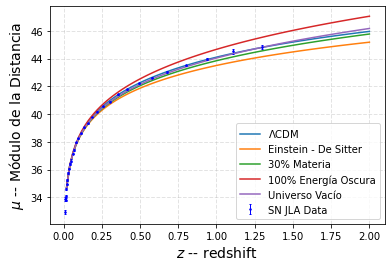

In [52]:
plt.figure()
# plt.plot(z, mu(RH=c/H, z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0.0, AeO=0.7), label= 'λCDM')
plt.plot(z, mu(RH=c/H, z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0.0, AeO=0.7), label= '$\Lambda$CDM')
# plt.plot(z, mu(RH=c/H, z=np.linspace(0, 2, 100), H=70, Am=1.0, Ar=0.0, AeO=0.0), label= 'EDS')
plt.plot(z, mu(RH=c/H, z=np.linspace(0, 2, 100), H=70, Am=1.0, Ar=0.0, AeO=0.0), label= 'Einstein - De Sitter')
plt.plot(z, mu(RH=c/H, z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0.0, AeO=0.0), label= '30% Materia')
plt.plot(z, mu(RH=c/H, z=np.linspace(0, 2, 100), H=70, Am=0.0, Ar=0.0, AeO=1.0), label= '100% Energía Oscura')
plt.plot(z, mu(RH=c/H, z=np.linspace(0, 2, 100), H=70, Am=0.0, Ar=0.0, AeO=0.0), label= 'Universo Vacío')
plt.errorbar(reds,Mu,yerr=muerr,fmt='o',ms=1.5,color='b',elinewidth=1.0,capsize=1,label='SN JLA Data')
# plt.errorbar(reds3,Mu3,yerr=muerr3,fmt='o',ms=1.5,color='g',elinewidth=1.0,capsize=1,label='hlsp_ps1cosmo_panstarrs_gpc1 Data')
# plt.errorbar(reds2,Mu2,yerr=muerr2,fmt='o',ms=1.5,color='k',elinewidth=1.0,capsize=1,label='SN DES_Y3 Data')
plt.legend()
plt.grid(alpha=0.35,linewidth=1,linestyle='--')
plt.xlabel(r'$z$ -- redshift', fontsize = 14)
plt.ylabel(r'$\mu$ -- Módulo de la Distancia', fontsize = 14)
# plt.title('Ley de Hubble', fontsize = 14)
plt.savefig('Ley De Hubble.png',
           format='png',
           dpi=200,
           transparent=False,
            bbox_inches='tight')

plt.show()

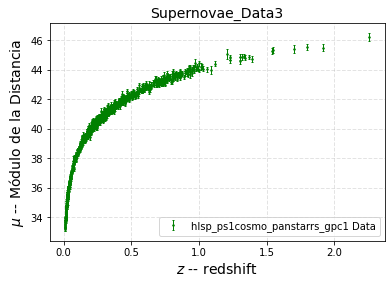

In [ ]:
plt.figure()
plt.errorbar(reds3,Mu3,yerr=muerr3,fmt='o',ms=1.5,color='g',elinewidth=1.0,capsize=1,label='hlsp_ps1cosmo_panstarrs_gpc1 Data')
plt.legend()
plt.grid(alpha=0.35,linewidth=1,linestyle='--')
plt.xlabel(r'$z$ -- redshift', fontsize = 14)
plt.ylabel(r'$\mu$ -- Módulo de la Distancia', fontsize = 14)
plt.title('Supernovae_Data3', fontsize = 14)
plt.savefig('SN panstarrs_gpc1_all_model_v1.png',
           format='png',
           dpi=200,
           transparent=False,
            bbox_inches='tight')

plt.show()

Calculamos el parámetro de Hubble para los diferentes modelos cosmológicos ya planteados

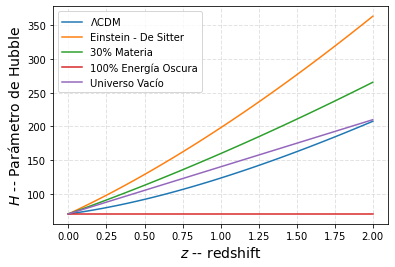

In [55]:
plt.figure()
# plt.plot(z, par_hubble(z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0, AeO=0.7), label= 'λCDM' )
plt.plot(z, par_hubble(z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0, AeO=0.7), label= '$\Lambda$CDM' )
#plt.plot(z, par_hubble(z=np.linspace(0, 2, 100), H=70, Am=1.0, Ar=0, AeO=0.0), label= 'EDS' )
plt.plot(z, par_hubble(z=np.linspace(0, 2, 100), H=70, Am=1.0, Ar=0, AeO=0.0), label= 'Einstein - De Sitter' )
plt.plot(z, par_hubble(z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0, AeO=0.0), label= '30% Materia' )
plt.plot(z, par_hubble(z=np.linspace(0, 2, 100), H=70, Am=0.0, Ar=0, AeO=1.0), label= '100% Energía Oscura' )
plt.plot(z, par_hubble(z=np.linspace(0, 2, 100), H=70, Am=0.0, Ar=0, AeO=0.0), label= 'Universo Vacío' )
plt.legend()
plt.grid(alpha=0.35,linewidth=1,linestyle='--')
plt.xlabel(r'$z$ -- redshift', fontsize = 14)
plt.ylabel(r'$H$ -- Parámetro de Hubble ', fontsize = 14)
# plt.title('Parámetro de Hubble', fontsize = 14)
plt.savefig('Parámetro de Hubble.png',
           format='png',
           dpi=200,
           transparent=False,
            bbox_inches='tight')
plt.show()


Calculamos la distancia radial comóvil para los diferentes modelos cosmológicos previamente planteados

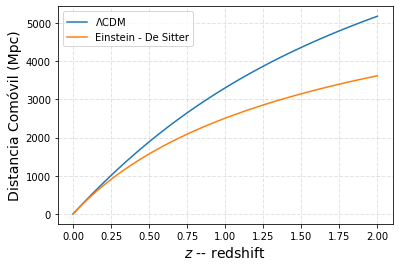

In [63]:
plt.figure()
# plt.plot(z, dist_comovil(z=np.linspace(0, 2,100), H=70,Am=0.3,Ar=0.0,AeO=0.7), label= 'λCDM')
plt.plot(z, dist_comovil(z=np.linspace(0, 2,100), H=70,Am=0.3,Ar=0.0,AeO=0.7), label= '$\Lambda$CDM')
# plt.plot(z, dist_comovil(z=np.linspace(0, 2,100), H=70,Am=1.0,Ar=0.0,AeO=0.0), label=  'EDS')
plt.plot(z, dist_comovil(z=np.linspace(0, 2,100), H=70,Am=1.0,Ar=0.0,AeO=0.0), label=  'Einstein - De Sitter')
# plt.plot(z, dist_comovil(z=np.linspace(0, 2,100), H=70,Am=0.3,Ar=0.0,AeO=0.7), label= '30% Materia')
# plt.plot(z, dist_comovil(z=np.linspace(0, 2,100), H=70,Am=0.3,Ar=0.0,AeO=0.7), label= '100% Energía Oscura')
# plt.plot(z, dist_comovil(z=np.linspace(0, 2,100), H=70,Am=0.3,Ar=0.0,AeO=0.7), label= 'Universo Vacío')

plt.legend()
plt.grid(alpha=0.35,linewidth=1,linestyle='--')
plt.xlabel(r'$z$ -- redshift', fontsize = 14)
plt.ylabel('Distancia Comóvil (Mpc)', fontsize = 14)
# plt.title('Distancia Radial Comóvil', fontsize = 14)
plt.savefig('Distancia Comóvil.png',
           format='png',
           dpi=200,
           transparent=False,
            bbox_inches='tight')
plt.show()


# Ajuste de los datos de supernovas tipo Ia

Podemos calcular qué parametros cosmológicos generan un modelo que describe mejor los datos que tenemos de supernovas. Para ello podemos seguir el proceso de **minimización de mínimos cuadrados**, que esquemáticamente consiste en:


*   Para un determinado valor de un parámetro cosmológico, por ejemplo $\Omega_\Lambda$ = 0.5 calculamos el módulo de distancia
*   Calculamos el $\chi^2$ según la ecuación 

    $\chi^2 = \frac{datos - modelo}{error^2}$

* Guardamos el valor del $\chi^2$ que arroja comparar los datos con el módulo de distancia evaluado en $\Omega_\Lambda = 0.5$.

* Repetimos el proceso para un conjunto de valores del parámetro que queremos inferir



In [ ]:
# Leemos los datos de supernovas Ia de JLA
data=np.loadtxt("betoule_sn.txt",delimiter=' ',usecols=np.arange(4),skiprows=1)
# reds
reds=data[:,1]
# Mu 
Mu=data[:,2]
# mu error
muerr=data[:,3]

In [ ]:
# Generamos arrays para el parámetro cosmológico y para el Chi^2
Ol = np.zeros(500)
chi2 = np.zeros(500)

In [ ]:
import numpy as np

In [ ]:
# Calculamos el valor del Chi^2 para los diferentes valores de Omega Lambda
for i in np.arange(500):
  # print(i)
  Ol[i] = 0.05 + i*0.95/300
  # print(r'En esta iteración $\Omega_\Lambda = ${}'.format(Ol[i]))
  # chi2[i] = np.sum((Mu-25-5*np.log10(mu(Ak=0, RH=c/H, z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0.0, AeO=0.7)))**2/muerr**2)
  chi2[i] = np.sum((Mu-mu(RH=c/H, z=reds, H=70, Am=1-Ol[i], Ar=0.0, AeO=Ol[i]))**2/muerr**2) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  from ipykernel import kernelapp as app


In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(chi2)

In [ ]:
# Buscamos el mínimo
ind=list(chi2).index(min(chi2))
chi2_min=chi2[ind]    
Ol_min=Ol[ind]

In [ ]:
print(Ol_min)

0.7023333333333334


In [ ]:
# Calculamos el error asociado a la estimación
error=0.0
for ie in np.arange(500):
    if ( np.abs(chi2[ie]-chi2_min-1)<0.15): # 0.15 es un valor ajustado a mano
       
        error=np.abs(Ol[ie]-Ol_min)

In [ ]:
chi2

In [ ]:
print('(JLA) Best fit values Omega_Lambda: {0} +/- {1}'.format(round(Ol_min,3),round(error,3)))

Best fit values Omega_Lambda: 0.702 +/- 0.016


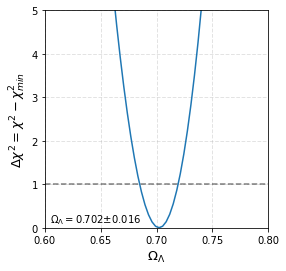

In [ ]:
""" Plotting Chi-2 """
plt.figure(figsize=(4,4))
plt.plot(Ol,chi2-chi2_min)
plt.xlabel(r'$\Omega_{\Lambda}$',fontsize=13)
plt.ylabel(r'$\Delta \chi^2 = \chi^2 - \chi_{min}^2$',fontsize=13)
plt.xlim([0.6,0.8])
plt.ylim([0,5])
plt.grid(alpha=0.35,linewidth=1,linestyle='--')
plt.hlines(y=1,xmin=0.6,xmax=0.8,linestyles='dashed',alpha=0.5)
plt.text(0.605,0.12,s=r'$\Omega_\Lambda=${0}$\pm${1}'.format(round(Ol_min,3),round(error,3)))
plt.savefig(os.path.join('sn_chi2.png'),
            format='png',
            dpi=200,
            transparent=False,
            bbox_inches='tight')
plt.show()

Repetimos el cálculo considerando los datos de supernovas Ia de PanStarrs


In [64]:
data3=np.genfromtxt ("hlsp_ps1cosmo_panstarrs_gpc1_all_model_v1_lcparam-full.txt", delimiter=' ',usecols=np.arange(6), skip_header=1)
#reds3
reds=data3[:,1]
#mb2
mb2=data3[:,4]
#muerr3
muerr=data3[:,5]

#Añadimos el valor añadido para obtener el módulo de la distacia(Mu3) correcto
Mu=mb2 + 19.35

In [65]:
# Generamos arrays para el parámetro cosmológico y para el Chi^2
Ol = np.zeros(500)
chi2 = np.zeros(500)

In [66]:
# Calculamos el valor del Chi^2 para los diferentes valores de Omega Lambda
for i in np.arange(500):
  # print(i)
  Ol[i] = 0.05 + i*0.95/300
  # print(r'En esta iteración $\Omega_\Lambda = ${}'.format(Ol[i]))
  # chi2[i] = np.sum((Mu-25-5*np.log10(mu(Ak=0, RH=c/H, z=np.linspace(0, 2, 100), H=70, Am=0.3, Ar=0.0, AeO=0.7)))**2/muerr**2)
  chi2[i] = np.sum((Mu-mu(RH=c/H, z=reds, H=70, Am=1-Ol[i], Ar=0.0, AeO=Ol[i]))**2/muerr**2) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  from ipykernel import kernelapp as app


In [67]:
# Buscamos el mínimo
ind=list(chi2).index(min(chi2))
chi2_min=chi2[ind]    
Ol_min=Ol[ind]

In [73]:
# Calculamos el error asociado a la estimación
error=0.0
for ie in np.arange(500):
    if ( np.abs(chi2[ie]-chi2_min-1)<0.18): # 0.15 es un valor ajustado a mano
       
        error=np.abs(Ol[ie]-Ol_min)

In [74]:
print('(PanStarrs) Best fit values Omega_Lambda: {0} +/- {1}'.format(round(Ol_min,3),round(error,3)))

(PanStarrs) Best fit values Omega_Lambda: 0.709 +/- 0.006


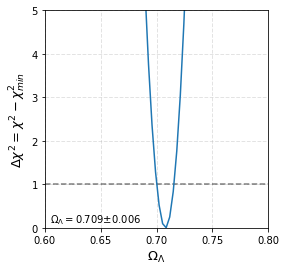

In [75]:
""" Plotting Chi-2 """
plt.figure(figsize=(4,4))
plt.plot(Ol,chi2-chi2_min)
plt.xlabel(r'$\Omega_{\Lambda}$',fontsize=13)
plt.ylabel(r'$\Delta \chi^2 = \chi^2 - \chi_{min}^2$',fontsize=13)
plt.xlim([0.6,0.8])
plt.ylim([0,5])
plt.grid(alpha=0.35,linewidth=1,linestyle='--')
plt.hlines(y=1,xmin=0.6,xmax=0.8,linestyles='dashed',alpha=0.5)
plt.text(0.605,0.12,s=r'$\Omega_\Lambda=${0}$\pm${1}'.format(round(Ol_min,3),round(error,3)))
plt.savefig(os.path.join('sn_chi2_panstarrs.png'),
            format='png',
            dpi=200,
            transparent=False,
            bbox_inches='tight')
plt.show()